# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

---

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [19]:
"""
se hará el método de runge-kutta para resolver una ecuación diferencial de la forma dy/dx=f(x,y),
considerando el valor de una condicion inicial x_0, con cierto número de pasos, y cierto valor de y_0
"""
function runge_kutta_4(f,x_0,y_0,n)
    x_f=0.1
    a=zeros(n+1) #"x"
    b=zeros(n+1) #"y"
    h=(x_f-x_0)/n
    a[1]=x_0
    b[1]=y_0
    for i in 1:n
        k_1=f(a[i],b[i])     #condiciones necesarias para definir el siguiente valor de "y" y de "x"
        k_2=f(a[i]+(h*(1/2)),b[i]+((1/2)*((k_1)*h)))
        k_3=f(a[i]+(h*(1/2)),b[i]+((1/2)*((k_2)*h)))
        k_4=f(a[i]+h,b[i]+((k_3)*h))
        b[i+1]=a[i]+(1/6)*(h)*(k_1+2*k_2+2*k_3+k_4)
        a[i+1]=a[i]+h
    end
    return a,b
end

runge_kutta_4

In [33]:
f(x,y)=y^2

f (generic function with 1 method)

Any) in module Main at In[32]:1 overwritten at In[33]:1.


In [34]:
R=runge_kutta_4(f,0,3,10000)

([0.0,1.0e-5,2.0e-5,3.0e-5,4.0e-5,5.0e-5,6.0e-5,7.0e-5,8.0e-5,9.0e-5  …  0.09991,0.09992,0.09993,0.09994,0.09995,0.09996,0.09997,0.09998,0.09999,0.1],[3.0,0.000270036,1.0e-5,2.0e-5,3.0e-5,4.0e-5,5.0e-5,6.0e-5,7.0e-5,8.0e-5  …  0.0999,0.09991,0.09992,0.09993,0.09994,0.09995,0.09996,0.09997,0.09998,0.09999])

In [35]:
typeof(ans)

Tuple{Array{Float64,1},Array{Float64,1}}

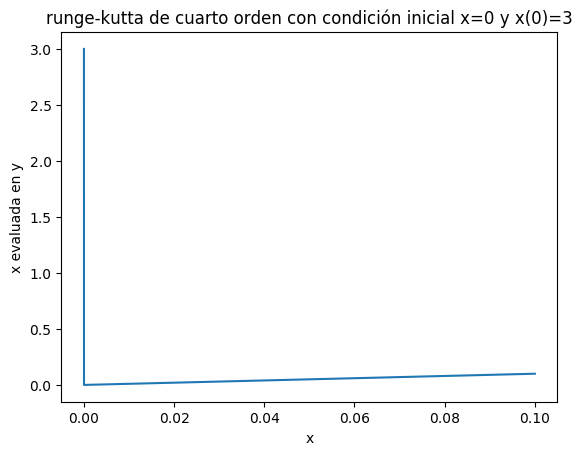

In [37]:
using PyPlot
plot(R[1],R[2])
title("runge-kutta de cuarto orden con condición inicial x=0 y x(0)=3")
xlabel("x")
ylabel("x evaluada en y")
show()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

In [38]:
function runge_kutta_4_2(f,x_0,y_0,y_1,n)
    x_f=1
    h=((x_f)-(x_0))/n
    
end

runge_kutta_4_2 (generic function with 1 method)